In [2]:
import matplotlib.pyplot as plt
from ai2thor.controller import Controller
import ai2thor.robot_controller
import datetime
import os
import numpy as np
import torch
import cv2
import sys
sys.path.append('../')
from utils.hacky_viz_utils import depth_to_rgb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

controller = ai2thor.robot_controller.Controller(host="stretch2", port=9000, width=1280, height=720) # TODO frame width and height?
# controller = ai2thor.robot_controller.Controller(host="172.16.121.188", port=9000, width=1280, height=720) # TODO frame width and height?
controller.step('Initialize')



'-- Start:'
'ACTION "Initialize"'
'POST'
200


KeyError: 'actionReturn'

In [3]:
def visualize(controller, save_frame = False, separate_frame=False):
#     image_kinect = controller.last_event.frame
#     depth_kinect = controller.last_event.depth_frame
#     image_intel = controller.last_event.third_party_camera_frames[0]
#     depth_intel = controller.last_event.third_party_depth_frames[0]

    
    image_kinect = controller.last_event.frame
    depth_kinect = controller.last_event.depth_frame
    image_intel = controller.last_event.third_party_camera_frames[0]
    depth_intel = controller.last_event.third_party_depth_frames[0]
    
    #TODO this needs to be change
    depth_intel = depth_to_rgb(depth_intel)
    depth_kinect = depth_to_rgb(depth_kinect)

    depth_intel = rotate_frame(depth_intel)
    image_intel = rotate_frame(image_intel)
    
    [image_intel_original, image_kinect_original,depth_intel_original, depth_kinect_original] = [x.copy() for x in [image_intel, image_kinect,depth_intel, depth_kinect]]

    image_kinect = no_distortion_resize(image_kinect, 224)
    depth_kinect = no_distortion_resize(depth_kinect, 224)

    image_intel = no_distortion_resize(image_intel, 224)#[:,::-1, ::-1]
    depth_intel = no_distortion_resize(depth_intel, 224)

    combined = np.concatenate([image_intel,depth_intel,image_kinect, depth_kinect], axis=1)  / 255.
    
    if save_frame:
        path_to_save = '/Users/kianae/Desktop/real_stretch_images'
        os.makedirs(path_to_save, exist_ok=True)
        now = datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S_%f")
        plt.imsave(os.path.join(path_to_save, now+'.png'), combined)
        if separate_frame:
            for (i, image) in enumerate([image_intel_original, image_kinect_original,depth_intel_original, depth_kinect_original]):
                plt.imsave(os.path.join(path_to_save, now+f'_{i}.png'), image / 255.)
    else:
        plt.imshow(combined)
        plt.show()
#         return combined
    
def no_distortion_resize(frame, size):
    current_size = frame.shape
    bigger_size = max(current_size[0], current_size[1])
    ratio = size / bigger_size
    w,h = (int(current_size[0] * ratio), int(current_size[1] * ratio))
    
    resized_frame = cv2.resize(frame,(h,w))
    result = np.zeros((size, size, 3))
    start_w = int(size / 2 - w / 2)
    end_w = start_w + w
    start_h = int(size / 2 - h / 2)
    end_h = start_h + h
    result[start_w:end_w,start_h:end_h] = resized_frame
    return result
def rotate_frame(frame, deg=90):
    return cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

def manual_run(save_frame=False):
    while(True):
        visualize(controller, save_frame=save_frame)
        if save_frame:
            visualize(controller, False)

        action_options = ['m', 'r', 'l', 'b', 'hp', 'hm', 'zp', 'zm', 'go', 'gc', 'wp', 'wm']
        action = input()
        if action == 'q':
            break
        if action == 'm':
            controller.step('MoveAhead')
        if action == 'b':
            controller.step('MoveBack')
        if action == 'r':
            controller.step('RotateRight')
        if action == 'l':
            controller.step('RotateLeft')
        if action == 'rs':
            controller.step('RotateRightSmall')
        if action == 'ls':
            controller.step('RotateLeftSmall')
        if action == 'hp':
            controller.step('MoveArmBaseP')
        if action == 'hm':
            controller.step('MoveArmBaseN')
        if action == 'zp':
            controller.step('MoveArmTargetP')
        if action == 'zm':
            controller.step('MoveArmTargetN')
        if action == 'wp':
            controller.step('MoveWristP')
        if action == 'wm':
            controller.step('MoveWristN')
        if action == 'wps':
            controller.step('MoveWristPSmall')
        if action == 'wms':
            controller.step('MoveWristNSmall')
        if action == 'go':
            controller.step('GraspOpen')
        if action == 'gc':
            controller.step('GraspClose')

    

In [3]:
visualize(controller,True, True)

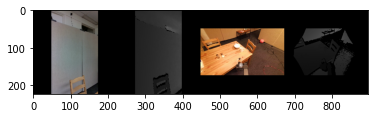

q


In [4]:
manual_run(True)

controller.last_event.frame.shape
